<a href="https://colab.research.google.com/github/Muh-Ikbal/Project/blob/main/tugas_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [4]:
# mengambil dataset
data = pd.read_csv('mail_data.csv')

# mendapatkan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Menampilkan dimensi dataset
data.shape

(5572, 2)

In [6]:
# Menampilkan dataset

data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
#  membersihkan dataset

# Menghapus baris terakhir (jika kosong)
data = data.iloc[:-1, :]

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Menghapus nilai null (jika ada)
data.dropna(inplace=True)

In [8]:
# Mengganti label 'spam' dengan 1 dan 'ham' dengan 0 dalam kolom 'Category'
data['Category'].replace({'spam': 1, 'ham': 0}, inplace=True);


In [9]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Membuat variable untuk atribut dan label
X = data['Message'] #atribut
Y = data['Category'] #Label

In [11]:
# menampilkan atribut
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [12]:
# menampilkan label
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Membagi X dan y menjadi data latih 70% dan data uji 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Membuat objek CountVectorizer untuk vektorisasi
vectorizer = CountVectorizer()

# Melakukan vektorisasi pada data latih dan data uji
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Melatih model DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorized, Y_train)


DecisionTreeClassifier()

In [14]:
# mengecek pembagian dataset
X_train.shape, X_test.shape

((3609,), (1547,))

In [15]:
# Melakukan prediksi pada data uji yang telah di-vektorisasi
Y_pred = tree_model.predict(X_test_vectorized)

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy:', round(acc, 3))

Accuracy: 0.955


In [17]:
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test_vectorized)
print('Model accuracy score with criterion gini index: {0:0.3f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with criterion gini index: 0.955


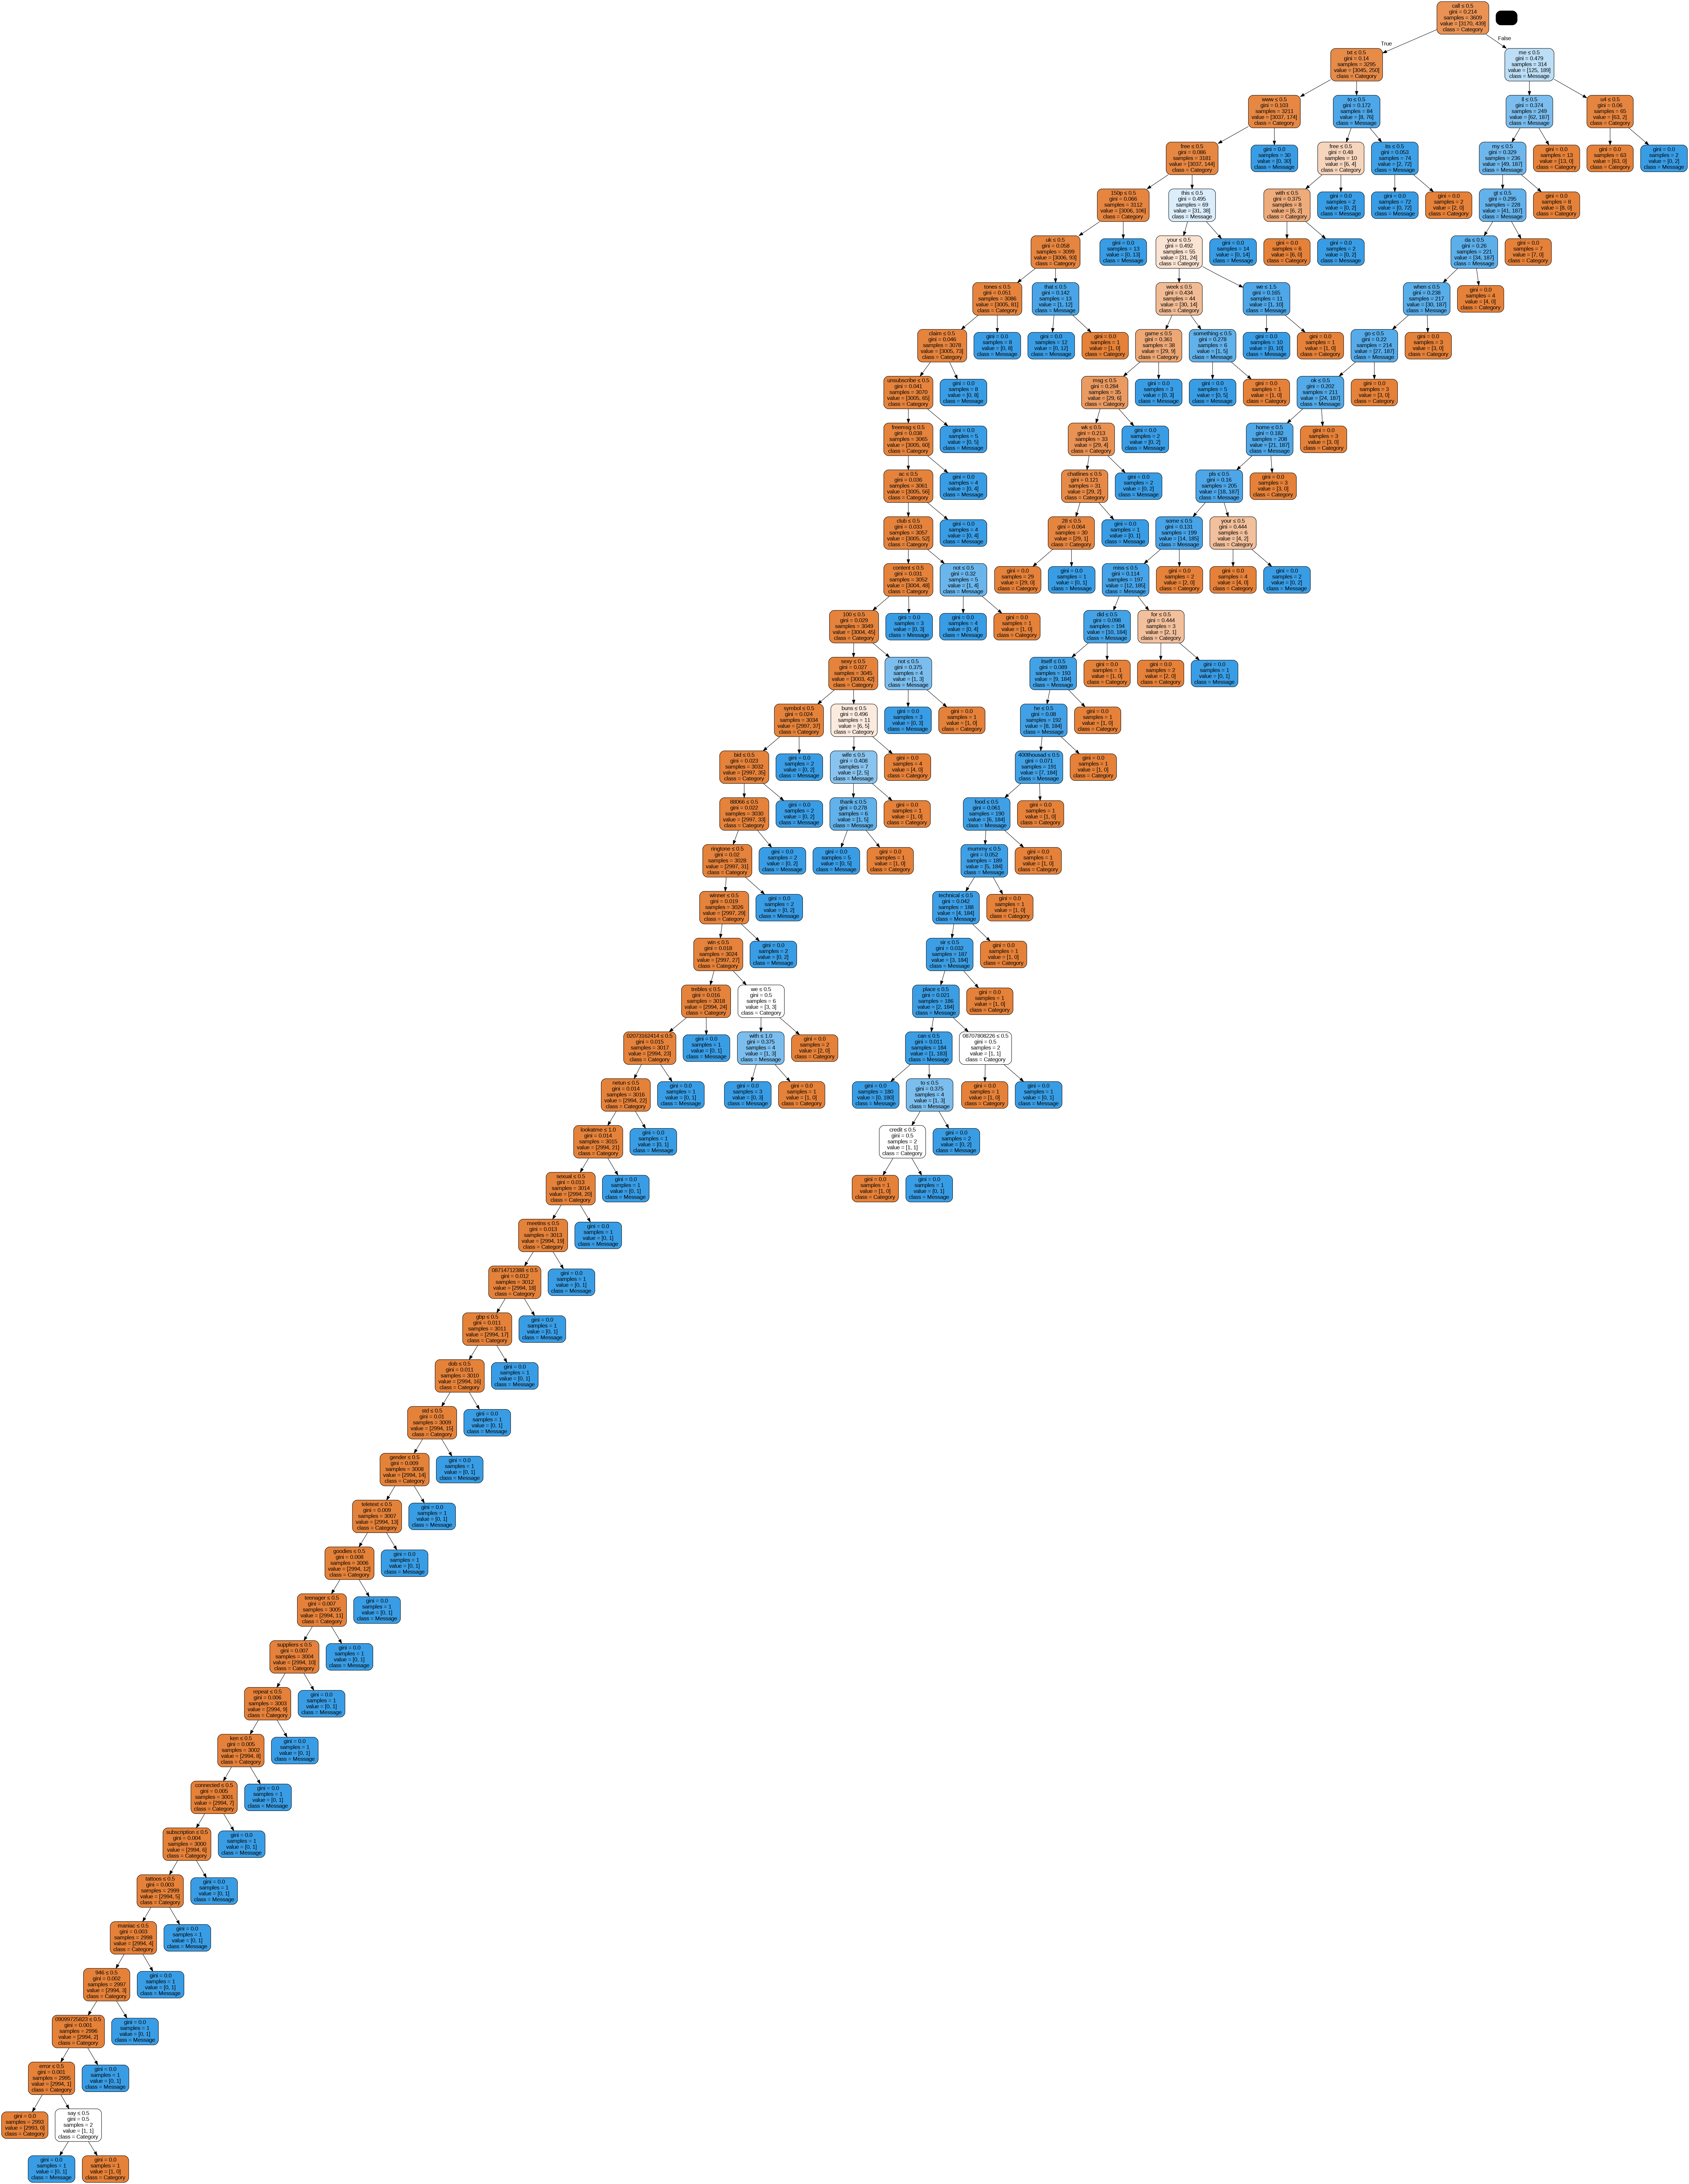

In [18]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Membuat dot data dari model DecisionTreeClassifier
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=vectorizer.get_feature_names_out(),
                class_names=['Category', 'Message'])  # Ganti dengan nama kelas Anda

# Membuat graph dari dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Memvisualisasikan graph
Image(graph.create_png())

In [19]:
# from sklearn.tree import export_graphviz
# from io import StringIO
# from IPython.display import Image
# import pydotplus

# # Membuat model DecisionTreeClassifier dengan batasan jumlah node dan kedalaman
# tree_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, random_state=2529)
# tree_model.fit(X_train_vectorized, Y_train)

# # Membuat dot data dari model DecisionTreeClassifier
# dot_data = StringIO()
# export_graphviz(tree_model, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True,
#                 feature_names=vectorizer.get_feature_names_out(),
#                 class_names=['Category', 'Message'])  # Ganti dengan nama kelas Anda

# # Membuat graph dari dot data
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


# # Memvisualisasikan graph
# Image(graph.create_png())


In [20]:
# import graphviz
# from sklearn import tree

# # Mendapatkan daftar nama fitur dari CountVectorizer
# feature_names = vectorizer.get_feature_names_out()

# # Mendapatkan daftar nama kelas unik dari target dan mengonversinya menjadi string
# class_names = Y_train.unique().astype(str)

# # Membuat dot data dari model DecisionTreeClassifier
# dot_data = tree.export_graphviz(tree_model, out_file=None,
#                               feature_names=feature_names,
#                               class_names=['Category', 'Message'],
#                               filled=True, rounded=True,
#                               special_characters=True)

# # Membuat objek graphviz dari dot data
# graph = graphviz.Source(dot_data)

# # Menampilkan graph
# graph
